<a href="https://colab.research.google.com/github/thap/ml-sklearn-tensorflow/blob/master/03_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/data/handon-ml/')
print(os.getcwd())
!ls

/content/drive/My Drive/data/handon-ml
datasets  images


In [0]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'

def savefig(fig_id, tight_layout=True):
  path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format='png', dpi=300)


In [0]:
from sklearn.datasets import fetch_openml

In [0]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

In [6]:
type(mnist)

sklearn.utils.Bunch

In [0]:
import numpy as np

np.random.seed(42)
shuffle_idx = np.random.permutation(70000)

In [8]:
mnist.data = mnist.data[shuffle_idx]
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
mnist.target = mnist.target[shuffle_idx]
mnist.target

array([8, 4, 8, ..., 1, 0, 0], dtype=int8)

In [10]:
np.unique(mnist.target[60000:], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([ 959, 1161, 1030,  984,  972,  912,  999, 1040,  991,  952]))

In [0]:
X = mnist.data
y = mnist.target

In [12]:
X_train = X[:60000]
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_test = X[60000:]
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y_train = y[:60000]
y_train

array([8, 4, 8, ..., 0, 8, 1], dtype=int8)

In [15]:
y_test = y[60000:]
y_test

array([0, 0, 6, ..., 1, 0, 0], dtype=int8)

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([ 959, 1161, 1030,  984,  972,  912,  999, 1040,  991,  952]))

# Binary Classifier

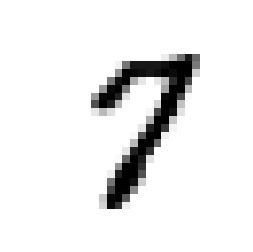

7


In [39]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [0]:
y_train_7 = (y_train == 7)
x_test_7 = (y_test == 7)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([False])

In [22]:
sgd_clf.predict([X[69999]])

array([False])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.97630118, 0.9758    , 0.97889894])

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_7):
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_7[train_index])
  X_test_fold = X_train[test_index]
  y_test_fold = (y_train_7[test_index])
  clone_clf = clone(sgd_clf)
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9763011849407529
0.9758
0.9788989449472474


In [0]:
from sklearn.base import BaseEstimator
class Never7Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [26]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.8922 , 0.896  , 0.89915])

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[52848,   899],
       [  481,  5772]])

In [0]:
y_train_pred_perfect = y_train_7

In [31]:
confusion_matrix(y_train_7, y_train_pred_perfect)

array([[53747,     0],
       [    0,  6253]])

In [32]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_7, y_train_pred)

0.8652375955628842

In [33]:
recall_score(y_train_7, y_train_pred)

0.9230769230769231

In [0]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train_7, y_train_pred)

0.89322191272052

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([186198.16787303])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3, 
                             method='decision_function')

In [43]:
y_scores.shape

(60000,)

In [46]:
y_scores.ndim

1

In [0]:
if y_scores.ndim == 2:
  y_scores = y_scores[:,1]

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

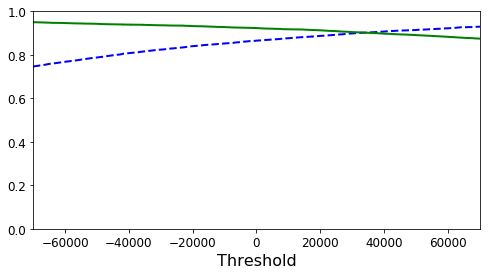

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
  plt.xlabel('Threshold', fontsize=16)
  plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-70000, 70000])
plt.show()

In [53]:
(y_train_pred == (y_scores > 0)).all()

True

In [0]:
y_train_pred_90 = (y_scores > 70000)

In [55]:
precision_score(y_train_7, y_train_pred_90)

0.9294697484704283

In [56]:
recall_score(y_train_7, y_train_pred_90)

0.8746201823124901

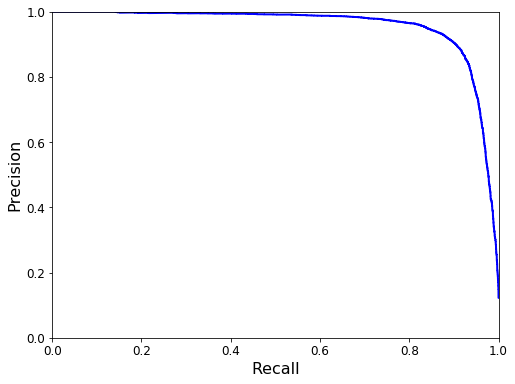

In [58]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel('Recall', fontsize=16)
  plt.ylabel('Precision', fontsize=16)
  plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

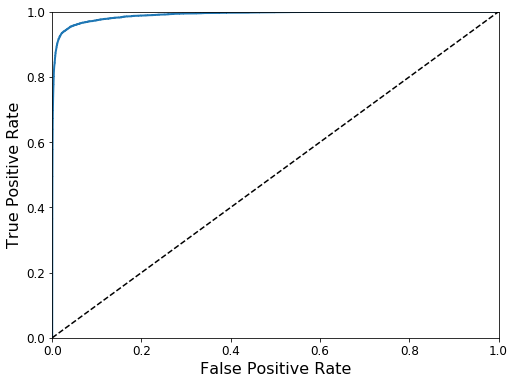

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_scores)

0.9902886661288921

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, 
                                    method='predict_proba')

In [0]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

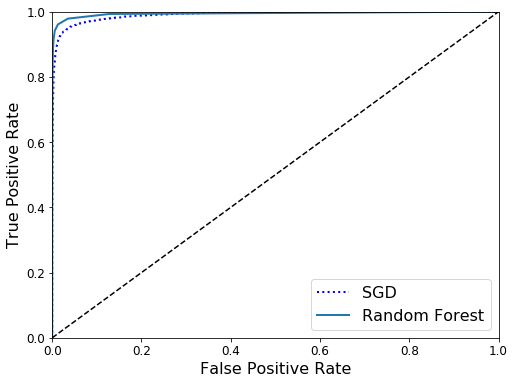

In [66]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [67]:
roc_auc_score(y_train_7, y_scores_forest)

0.993772854510699

In [68]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3)
precision_score(y_train_7, y_train_pred_forest)

0.9841043043400607

In [69]:
recall_score(y_train_7, y_train_pred_forest)

0.8811770350231889